In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
sns.set_context("notebook")
sns.set_theme()
sns.set_palette("Set3")
sns.set(font_scale=1.3)

In [10]:
maciek = pd.read_csv('./../data/running_data.csv')
world = pd.read_csv('./../data/world_records.csv')

In [11]:
maciek = maciek.loc[maciek['Type'] == 'Records']
maciek = maciek[['Moving Time', 'Distance']]
maciek['Moving Time'] = maciek['Moving Time']/60

In [12]:
world['Distance'] = world['Distance']/1000
world = world.loc[(maciek['Distance'].min() <= world['Distance']) & (world['Distance'] <= maciek['Distance'].max())]
world['Time'] = world['Time']/60

------
## Porównanie rekordów

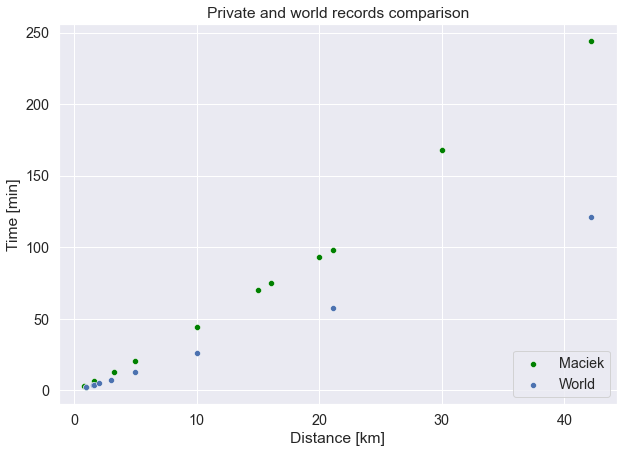

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.scatterplot(data=maciek, x='Distance', y='Moving Time', color='green', label='Maciek')
sns.scatterplot(data=world, x='Distance', y='Time', color='C0', label='World')
ax.set_ylabel('Time [min]')
ax.set_xlabel('Distance [km]')
ax.set_title('Private and world records comparison')
ax.legend(loc=4)
plt.show()

-----
## Tempo

In [22]:
maciek['pace'] = maciek['Moving Time']/maciek['Distance']
world['pace'] = world['Time']/world['Distance']

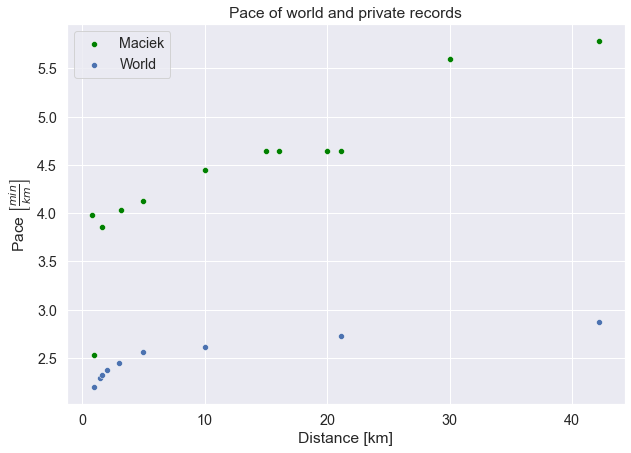

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_ylabel(r'Pace $\left[\frac{min}{km}\right]$')
ax.set_xlabel('Distance [km]')
ax.set_title('Pace of world and private records')
sns.scatterplot(data=maciek, x='Distance', y='pace', color='green', label='Maciek')
sns.scatterplot(data=world, x='Distance', y='pace', color='C0', label='World')
ax.legend(loc=2)
#plt.savefig('./../images/pace_maciek_world.jpg', dpi=300)

------
## Stosunek

In [26]:
maciek_world = pd.merge(maciek, world, on='Distance')

In [27]:
maciek_world['ratio'] = maciek_world['Time']/maciek_world['Moving Time']
maciek_world

,Moving Time,Distance,pace_x,Time,pace_y,ratio
0,2.533333,1.0000,2.533333,2.199333,2.199333,0.868158
1,20.650000,5.0000,4.130000,12.816667,2.563333,0.620662
2,44.466667,10.0000,4.446667,26.183333,2.618333,0.588831
3,98.083333,21.0975,4.649050,57.516667,2.726231,0.586406
4,244.016667,42.1950,5.783071,121.150000,2.871193,0.496482


Text(0.5, 1.0, 'Ratio of world and private records')

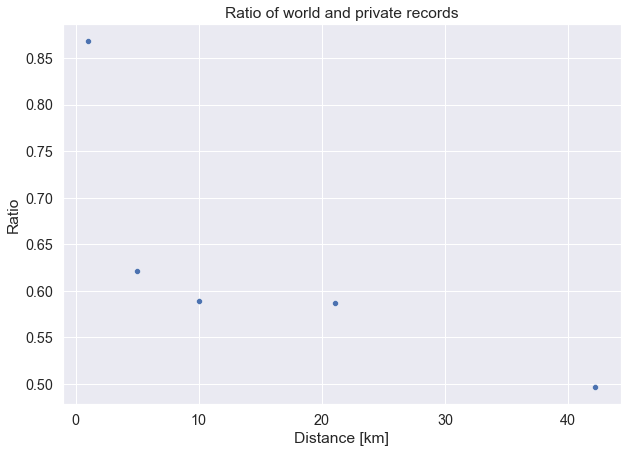

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.scatterplot(data=maciek_world, x='Distance', y='ratio', color='C0')
ax.set_ylabel('Ratio')
ax.set_xlabel('Distance [km]')
ax.set_title('Ratio of world and private records')
#plt.savefig("images/ratio_maciek_world.jpg", dpi=300)